In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds_titanic=pd.read_csv("Titanic_data.csv")
ds_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Exploratotry Data Analysis

In [3]:
ds_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
ds_titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
ds_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

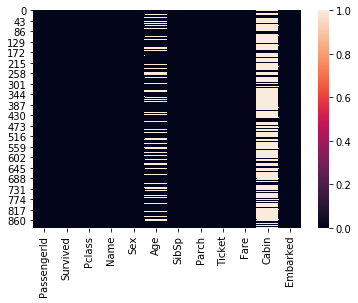

In [6]:
sns.heatmap(ds_titanic.isnull())

### Dropping Columns

Here the target variable is survived...
Columns "Name" "Tiket and "Cabin" can be dropped as they are lesser important

In [7]:
cols=["Name","Ticket","Cabin"]
ds_titanic=ds_titanic.drop(cols,axis=1)
ds_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [8]:
ds_titanic.isnull().sum()  #the above columns are dropped in the below data 

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [9]:
ds_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Removing Missing Values

In [10]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")  #assigning mode strategy to column Embarked
ds_titanic["Embarked"]=imp.fit_transform(ds_titanic["Embarked"].values.reshape(-1,1))
imp=SimpleImputer(strategy="mean")   #assigning mean strategy to column Embarked
ds_titanic["Age"]=imp.fit_transform(ds_titanic["Age"].values.reshape(-1,1))
ds_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


### Re-checking missing values

In [11]:
ds_titanic.isnull().sum()   #we can see no missing values are present below

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Label Encoding / Quantifying

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds_titanic["Sex"]=le.fit_transform(ds_titanic["Sex"].astype(str))
ds_titanic["Embarked"]=le.fit_transform(ds_titanic["Embarked"].astype(str))
ds_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [13]:
ds_titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### Plotting Outliers

PassengerId       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Survived       AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Pclass          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Sex            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Age            AxesSubplot(0.766379,0.536818;0.133621x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.133621x0.343182)
Parch             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Fare               AxesSubplot(0.44569,0.125;0.133621x0.343182)
Embarked          AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

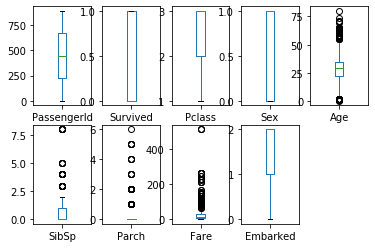

In [14]:
ds_titanic.plot(kind="box",subplots=True,layout=(2,5))

### Removing Outliers

In [15]:
from scipy.stats import zscore
z_score=abs(zscore(ds_titanic))
print(ds_titanic.shape)
ds_titanic_final=ds_titanic.loc[(z_score<3).all(axis=1)]
print(ds_titanic_final.shape)

(891, 9)
(820, 9)


### Checking Skewness

In [16]:
ds_titanic.skew()     #plotting skewness before removing outliers

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

In [17]:
ds_titanic_final.skew()   #plotting skewness after removing outliers

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.277386
dtype: float64

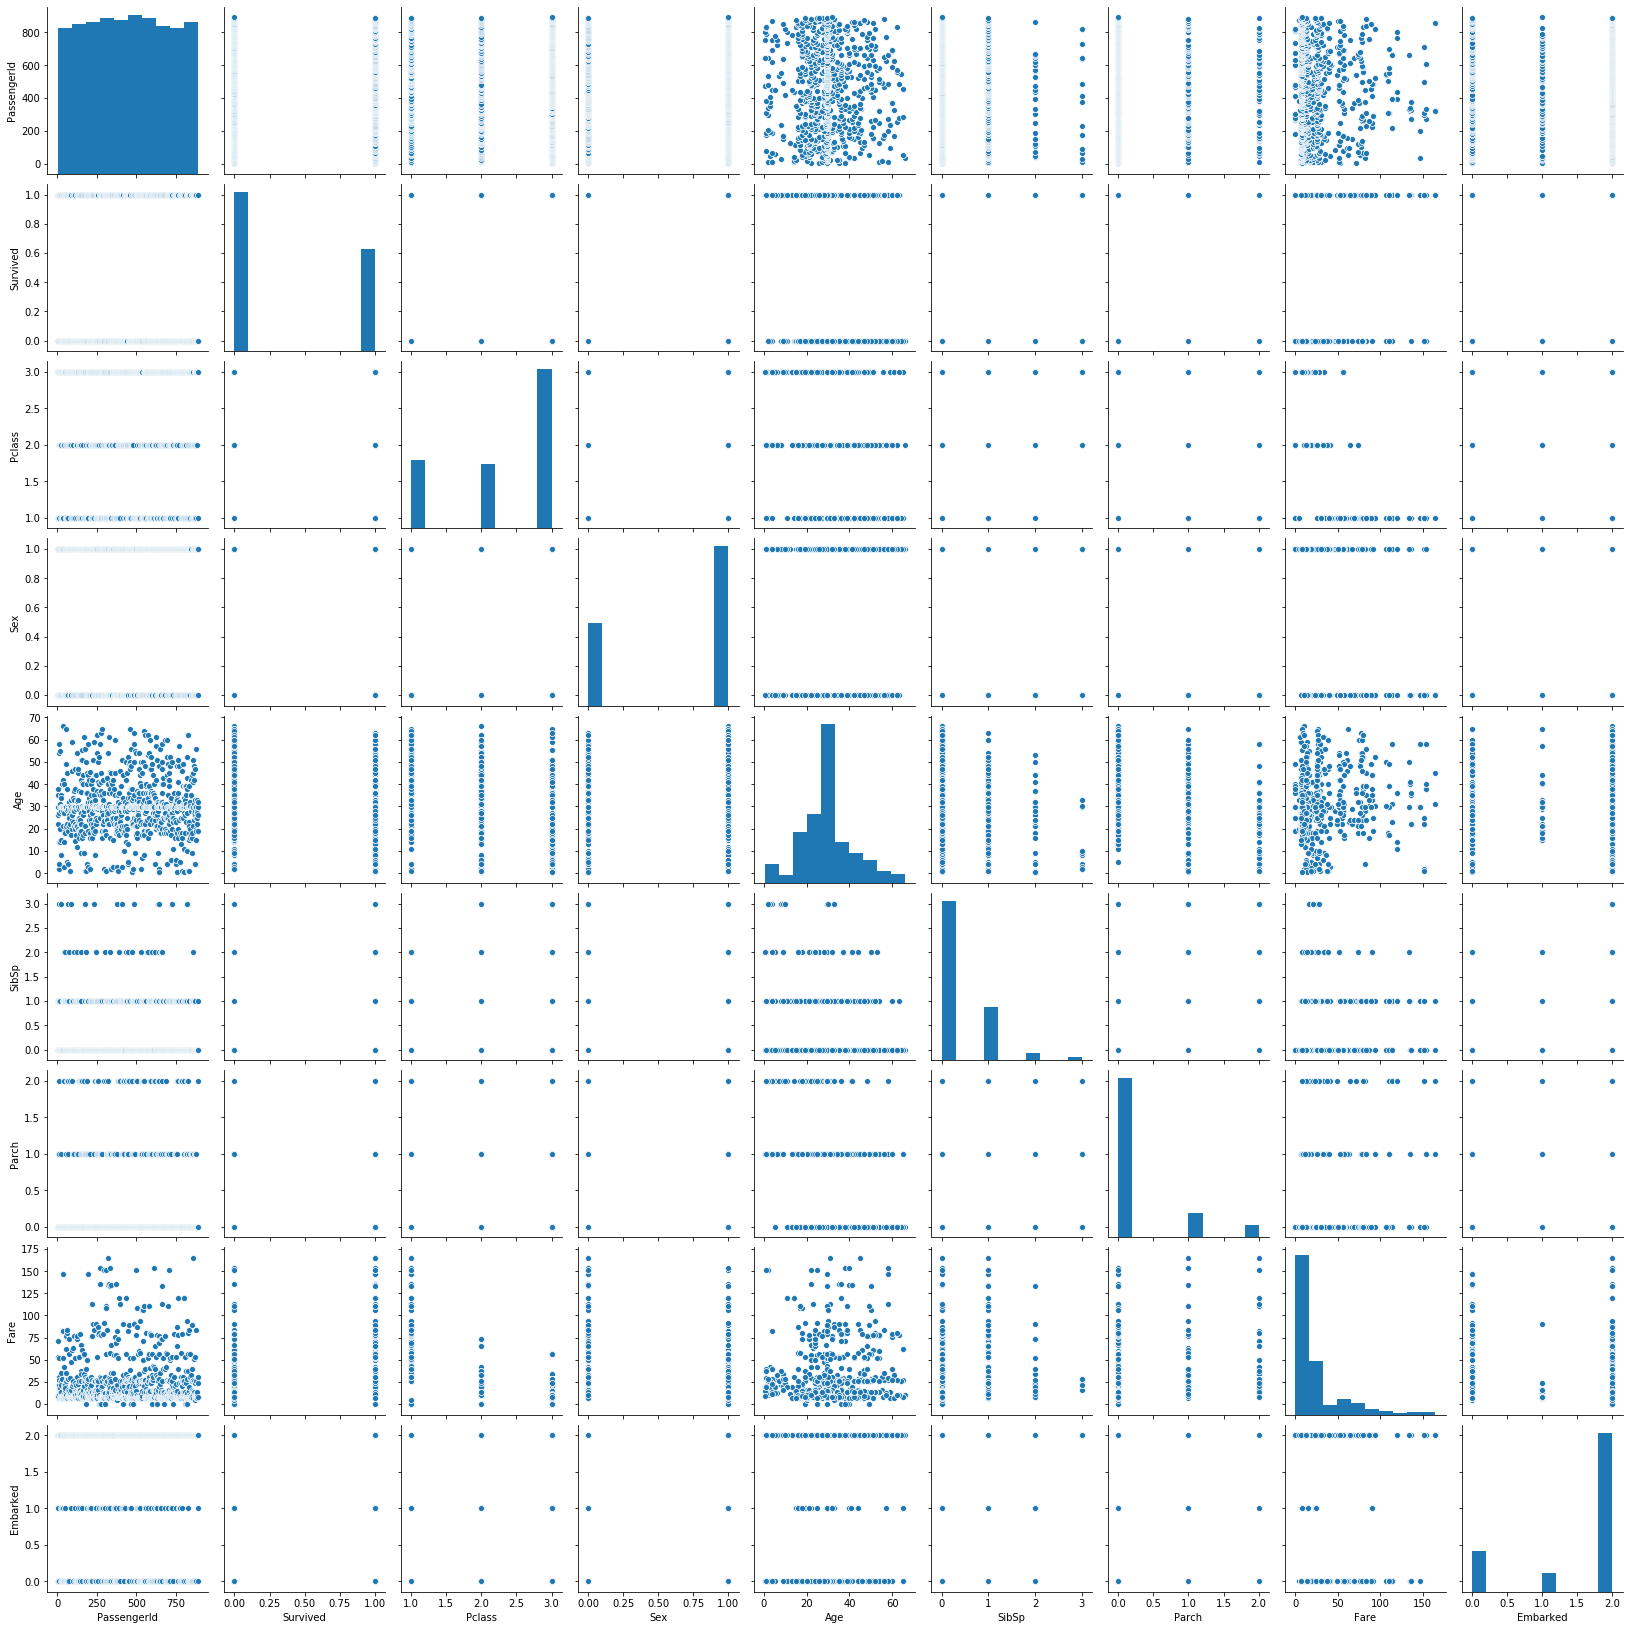

In [18]:
sns.pairplot(ds_titanic_final)

### Checking Correlation

In [19]:
ds_titanic_final.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.013852,-0.027701,0.066160,0.007532,-0.052125,0.005887,-0.005099,0.019099
Survived,-0.013852,1.000000,-0.322306,-0.554888,-0.090926,0.094459,0.201071,0.330439,-0.154994
Pclass,-0.027701,-0.322306,1.000000,0.138041,-0.327522,-0.052312,-0.078366,-0.691720,0.122145
Sex,0.066160,-0.554888,0.138041,1.000000,0.094544,-0.199204,-0.251872,-0.244614,0.116708
Age,0.007532,-0.090926,-0.327522,0.094544,1.000000,-0.148196,-0.259724,0.152344,-0.008781
SibSp,-0.052125,0.094459,-0.052312,-0.199204,-0.148196,1.000000,0.307210,0.247216,-0.013767
Parch,0.005887,0.201071,-0.078366,-0.251872,-0.259724,0.307210,1.000000,0.259903,-0.016184
Fare,-0.005099,0.330439,-0.691720,-0.244614,0.152344,0.247216,0.259903,1.000000,-0.192566
Embarked,0.019099,-0.154994,0.122145,0.116708,-0.008781,-0.013767,-0.016184,-0.192566,1.000000


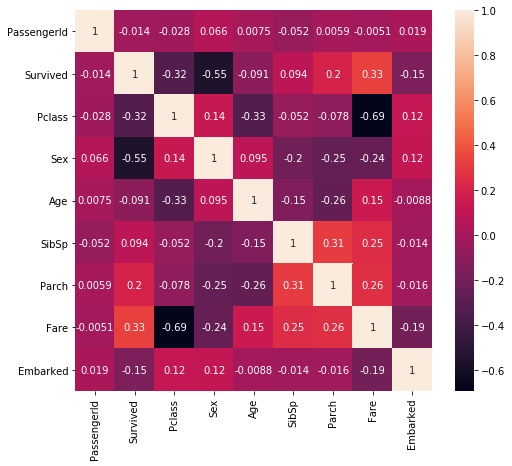

In [20]:
corr_hmap=ds_titanic_final.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

### Bi-Variate Analysis

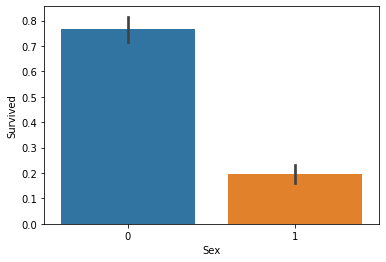

In [21]:
sns.barplot(x="Sex",y="Survived",data=ds_titanic_final)  #plotting the surviving rate based on gender

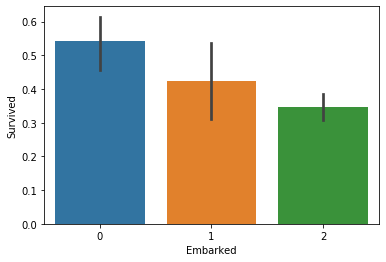

In [22]:
sns.barplot(x="Embarked",y="Survived",data=ds_titanic_final)

(array([ 36.,  37., 123.,  68.,  32.,  18.,   6.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 9 Patch objects>)

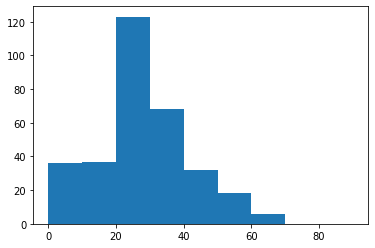

In [23]:
plt.hist(x="Age",bins=range(0,100,10),data=ds_titanic_final.loc[ds_titanic_final["Survived"]==1])

(array([ 46.,  90., 379., 159.,  82.,  46.,  18.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 9 Patch objects>)

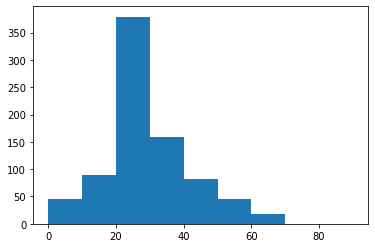

In [24]:
plt.hist(x="Age",bins=range(0,100,10),data=ds_titanic_final)

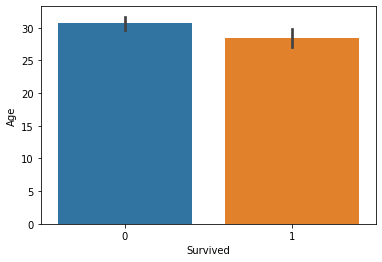

In [25]:
sns.barplot(x="Survived",y="Age",data=ds_titanic_final)

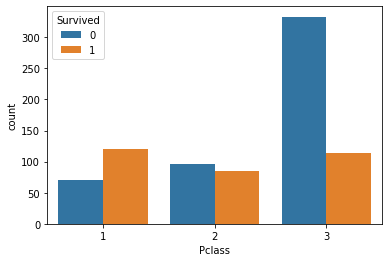

In [26]:
sns.countplot(x="Pclass",hue="Survived",data=ds_titanic_final)

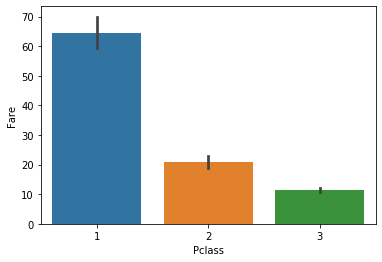

In [27]:
sns.barplot(x="Pclass",y="Fare",data=ds_titanic_final)

### Seperating Input and Target Variables

In [28]:
y=ds_titanic_final.iloc[:,1].values.reshape(-1,1)
y=pd.DataFrame(y)
y

,0
0,0
1,1
2,1
3,1
4,0
...,...
815,0
816,1
817,0
818,1


In [29]:
x=ds_titanic_final.iloc[:,[0,2,3,4,5,6,7,8]]
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,2
1,2,1,0,38.000000,1,0,71.2833,0
2,3,3,0,26.000000,0,0,7.9250,2
3,4,1,0,35.000000,1,0,53.1000,2
4,5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,2
887,888,1,0,19.000000,0,0,30.0000,2
888,889,3,0,29.699118,1,2,23.4500,2
889,890,1,1,26.000000,0,0,30.0000,0


### Splitting Training and Testing

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

### Machine Learning

#### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train.values.ravel())
pred=lr.predict(x_test)
print("Predict",pred)
print("\n")
print("Accuracy_Score",accuracy_score(pred,y_test))
print("\n")
print("Confusion_Matrix")
print(confusion_matrix(pred,y_test))
print('\n')
print("Classification_report")
print(classification_report(pred,y_test))

Predict [0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0]


Accuracy_Score 0.824390243902439


Confusion_Matrix
[[114  19]
 [ 17  55]]


Classification_report
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       133
           1       0.74      0.76      0.75        72

    accuracy                           0.82       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.83      0.82      0.82       205



#### Gaussian Naive_Bayes 

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train.values.ravel())
pred=gnb.predict(x_test)
print("Predict",pred)
print("\n")
print("Accuracy_Score",accuracy_score(pred,y_test))
print("\n")
print("Confusion_Matrix")
print(confusion_matrix(pred,y_test))
print("\n")
print("Classification_report")
print(classification_report(pred,y_test))

Predict [0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0]


Accuracy_Score 0.8146341463414634


Confusion_Matrix
[[109  16]
 [ 22  58]]


Classification_report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       125
           1       0.78      0.72      0.75        80

    accuracy                           0.81       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.81      0.81       205



#### KNN Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train.values.ravel())
pred=knn.predict(x_test)
print("Predict",pred)
print("\n")
print("Accuracy_Score",accuracy_score(pred,y_test))
print("\n")
print("Confusion_Matrix")
print(confusion_matrix(pred,y_test))
print("\n")
print("Classification_report")
print(classification_report(pred,y_test))

Predict [0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1
 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0]


Accuracy_Score 0.6585365853658537


Confusion_Matrix
[[99 38]
 [32 36]]


Classification_report
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       137
           1       0.49      0.53      0.51        68

    accuracy                           0.66       205
   macro avg       0.62      0.63      0.62       205
weighted avg       0.67      0.66      0.66       205



#### Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train.values.ravel())
pred=dtc.predict(x_test)
print("Predict",pred)
print("\n")
print("Accuracy_Score",accuracy_score(pred,y_test))
print("\n")
print("Confusion_Matrix")
print(confusion_matrix(pred,y_test))
print("\n")
print("Classification_report")
print(classification_report(pred,y_test))

Predict [1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0]


Accuracy_Score 0.751219512195122


Confusion_Matrix
[[102  22]
 [ 29  52]]


Classification_report
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       124
           1       0.70      0.64      0.67        81

    accuracy                           0.75       205
   macro avg       0.74      0.73      0.74       205
weighted avg       0.75      0.75      0.75       205



#### Support Vector Machine

In [42]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train.values.ravel())
pred=svc.predict(x_test)
print("Predict",pred)
print("\n")
print("Accuracy_Score",accuracy_score(pred,y_test))
print("\n")
print("Confusion_Matrix")
print(confusion_matrix(pred,y_test))
print("\n")
print("Classification_report")
print(classification_report(pred,y_test))

Predict [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0]


Accuracy_Score 0.7073170731707317


Confusion_Matrix
[[129  58]
 [  2  16]]


Classification_report
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       187
           1       0.22      0.89      0.35        18

    accuracy                           0.71       205
   macro avg       0.60      0.79      0.58       205
weighted avg       0.92      0.71      0.77       205



#### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train.values.ravel())
pred=rfc.predict(x_test)
print("Predict",pred)
print("\n")
print("Accuracy_Score",accuracy_score(pred,y_test))
print("\n")
print("Confusion_Matrix")
print(confusion_matrix(pred,y_test))
print("\n")
print("Classification_report")
print(classification_report(pred,y_test))

Predict [0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0]


Accuracy_Score 0.8634146341463415


Confusion_Matrix
[[122  19]
 [  9  55]]


Classification_report
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       141
           1       0.74      0.86      0.80        64

    accuracy                           0.86       205
   macro avg       0.84      0.86      0.85       205
weighted avg       0.87      0.86      0.87       205



#### Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train.values.ravel())
pred=gbc.predict(x_test)
print("Predict",pred)
print("\n")
print("Accuracy_Score",accuracy_score(pred,y_test))
print("\n")
print("Confusion_Matrix")
print(confusion_matrix(pred,y_test))
print("\n")
print("Classification_report")
print(classification_report(pred,y_test))

Predict [0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0]


Accuracy_Score 0.8195121951219512


Confusion_Matrix
[[118  24]
 [ 13  50]]


Classification_report
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       142
           1       0.68      0.79      0.73        63

    accuracy                           0.82       205
   macro avg       0.79      0.81      0.80       205
weighted avg       0.83      0.82      0.82       205



#### ExtraTrees Classifier

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train.values.ravel())
pred=etc.predict(x_test)
print("Predict",pred)
print("\n")
print("Accuracy_Score",accuracy_score(pred,y_test))
print("\n")
print("Confusion_Matrix")
print(confusion_matrix(pred,y_test))
print("\n")
print("Classification_report")
print(classification_report(pred,y_test))

Predict [0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1
 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0]


Accuracy_Score 0.848780487804878


Confusion_Matrix
[[118  18]
 [ 13  56]]


Classification_report
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       136
           1       0.76      0.81      0.78        69

    accuracy                           0.85       205
   macro avg       0.83      0.84      0.83       205
weighted avg       0.85      0.85      0.85       205



#### AdaBoost Classifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier
abc=ExtraTreesClassifier()
abc.fit(x_train,y_train.values.ravel())
pred=abc.predict(x_test)
print("Predict",pred)
print("\n")
print("Accuracy_Score",accuracy_score(pred,y_test))
print("\n")
print("Confusion_Matrix")
print(confusion_matrix(pred,y_test))
print("\n")
print("Classification_report")
print(classification_report(pred,y_test))

Predict [0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1
 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1
 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0]


Accuracy_Score 0.8146341463414634


Confusion_Matrix
[[116  23]
 [ 15  51]]


Classification_report
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       139
           1       0.69      0.77      0.73        66

    accuracy                           0.81       205
   macro avg       0.79      0.80      0.79       205
weighted avg       0.82      0.81      0.82       205



### Framing Compare Models

In [53]:
models = []
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('ExtraTreesClassifier',etc))
models.append(('AdaBoostClassifier',abc))

In [58]:
Model=[]
ac=[]
cvs=[]
for name, model in models:
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    ac.append(accuracy_score(y_test, y_pred))
    re=cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    cvs.append(re)
    Model.append(name)
result = pd.DataFrame({'Model': Model, 'Accuracy_score': ac ,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,0.658537,0.513415
1,SVC,0.707317,0.657317
2,LogisticRegression,0.824390,0.787805
3,DecisionTreeClassifier,0.756098,0.724390
4,GaussianNB,0.814634,0.776829
5,RandomForestClassifier,0.839024,0.791463
6,GradientBoostingClassifier,0.819512,0.748780
7,ExtraTreesClassifier,0.853659,0.807317
8,AdaBoostClassifier,0.834146,0.801220


### Saving the Model

I will be choosing Extra Trees Classifier for this dataset as the accuracy score and cross val score is the maximum for this model.

In [59]:
import joblib
joblib.dump(etc,"Titanic_etc_Model.obj")

['Titanic_etc_Model.obj']

### Loading Model

In [60]:
Titanic_etc_Model=joblib.load("Titanic_etc_Model.obj")

### Using Model

In [61]:
Titanic_etc_Model.predict(x_test)

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0], dtype=int64)